Question 6

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")


<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_252\2849086208.py:4: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")


In [3]:
data_2023 = data[data['Season_End_Year'] == 2023]
streaks = {}

for i,row in data_2023.iterrows():
    home = row['Home']
    away = row['Away']
    ftr = row['FTR']
    home_goals = row['HomeGoals']
    away_goals = row['AwayGoals']

    if home not in streaks:
        streaks[home] = {'win' : 0, 'lose' : 0}
    if away not in streaks:
        streaks[away] = {'win' : 0, 'lose' : 0}

    if ftr == 'H':
        streaks[home]['win'] += home_goals
        streaks[away]['lose'] += away_goals
    elif ftr == 'A':
        streaks[home]['lose'] += home_goals
        streaks[away]['win'] += away_goals
    else:
        streaks[home]['win'] += home_goals
        streaks[home]['lose'] += home_goals
        streaks[away]['win'] += away_goals
        streaks[away]['lose'] += away_goals

total_matchs = 38

for team in streaks:
    streaks[team]['avg_win'] = streaks[team]['win'] / total_matchs
    streaks[team]['avg_lose'] = streaks[team]['lose'] / total_matchs

streaks = pd.DataFrame(streaks)
streaks

,Crystal Palace,Arsenal,Fulham,Liverpool,Tottenham,Southampton,Newcastle Utd,Nott'ham Forest,Leeds United,Wolves,Bournemouth,Aston Villa,Everton,Chelsea,Leicester City,Brentford,Manchester Utd,Brighton,West Ham,Manchester City
win,35.000000,85.000000,44.000000,69.000000,56.000000,23.000000,67.000000,28.000000,30.000000,23.000000,28.000000,43.000000,27.000000,32.000000,34.000000,54.000000,51.000000,62.000000,33.000000,92.000000
lose,13.000000,12.000000,18.000000,19.000000,25.000000,27.000000,11.000000,23.000000,30.000000,14.000000,14.000000,14.000000,19.000000,16.000000,25.000000,20.000000,13.000000,22.000000,18.000000,9.000000
avg_win,0.921053,2.236842,1.157895,1.815789,1.473684,0.605263,1.763158,0.736842,0.789474,0.605263,0.736842,1.131579,0.710526,0.842105,0.894737,1.421053,1.342105,1.631579,0.868421,2.421053
avg_lose,0.342105,0.315789,0.473684,0.500000,0.657895,0.710526,0.289474,0.605263,0.789474,0.368421,0.368421,0.368421,0.500000,0.421053,0.657895,0.526316,0.342105,0.578947,0.473684,0.236842


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_11916\3206029522.py:1: SyntaxWarning: invalid escape sequence '\H'
  data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 6\streaks_2023.xlsx')


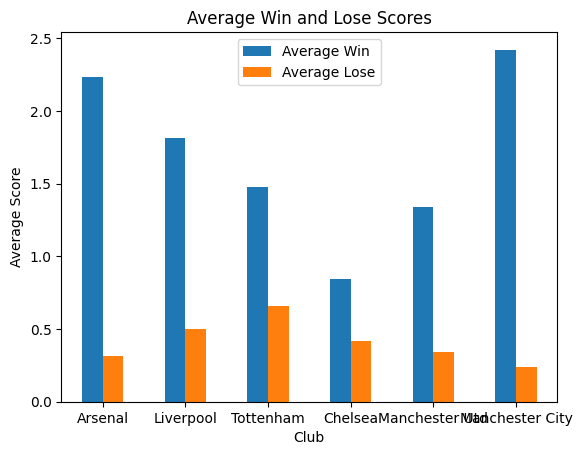

In [5]:
data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 6\streaks_2023.xlsx')

teams = ['Liverpool', 'Tottenham', 'Chelsea', 'Manchester Utd', 'Arsenal', 'Manchester City']

data_map = data_map[data_map['Club'].isin(teams)]

draw = data_map[['Club', 'Average Win', 'Average Lose']].set_index('Club')
draw.plot(kind='bar', stacked=False)

plt.title('Average Win and Lose Scores')
plt.xlabel('Club')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()